In [1]:

import torch
import random
import numpy as np
from collections import deque
from agent import Agent, BATCH_SIZE
from game import SnakeGameAI, Direction, Point, BOARD_SIZE
from model import DQN, SnakeDQN
from helper import plot
import math


pygame 2.6.0 (SDL 2.28.4, Python 3.8.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
plot_score = []
plot_q = []
plot_duration = []
plot_loss = []
total_score = 0
record = 0
agent = Agent()
game = SnakeGameAI()

In [3]:
def on_game_done(score):
    # train long memory, plot result
    n_moves = agent.n_moves
    game.reset()
    agent.n_games += 1
    agent.n_moves = 0
    agent.train_long_memory()

    global record
    if score > record:
        record = score
        # agent.target_net.save()

    print('Game', agent.n_games, 'Score', score, 'Record:', record)

    plot_score.append(score)
    # plot_scores.append(agent.epsilon)
    
    # global total_score
    # total_score += score
    # mean_score = total_score / agent.n_games
    
    # x = np.arange(len(plot_scores))
    # slope, intercept = np.polyfit(x, plot_scores, 1)
    # regression_line = slope * x + intercept
    # cleaplot_regression_line.append(regression_line)
    
    plot_duration.append(n_moves)
    
    plot_q.append(agent.trainer.get_avg_q())
    agent.trainer.q_vals = []
    
    plot_loss.append(agent.trainer.retrieve_avg_loss())
    agent.trainer.loss_vals = []
    
    # plot_loss = agent.trainer.loss_vals
    if agent.n_games % 100 == 0:
        plot(plot_score, plot_loss, plot_q)
    
    starting_state = game.get_current_state()
    return starting_state.flatten()

In [4]:
def step(state):
    # get move
    action = agent.get_action(state, game)

    # perform move and get new state
    reward, done, score = game.play_step(action)
    agent.n_moves += 1
    # print(f'step reward {reward}')
    
    if done:
        new_state = None
    else:
        new_state = game.get_current_state()
        new_state = new_state.flatten()

    agent.remember(state, action, new_state, torch.tensor([reward]))
    
    if done:
        return new_state, True, score
    return new_state, False, 0

<Figure size 432x288 with 0 Axes>

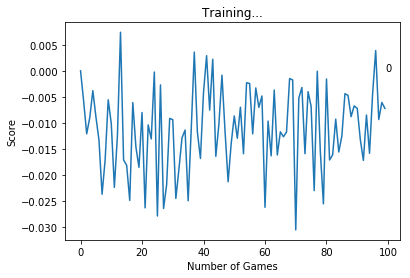

In [7]:
state = game.get_current_state()
state = state.flatten()

while agent.n_games < 100:
    state, game_done, play_score = step(state)
    if game_done:
        state = on_game_done(play_score)

In [8]:
agent.target_net.layer1.weight

Parameter containing:
tensor([[-0.0869,  0.1442, -0.0414,  ..., -0.0369,  0.1011,  0.1228],
        [ 0.0362,  0.1576, -0.0014,  ..., -0.1149,  0.1639,  0.1077],
        [ 0.0842,  0.0346,  0.0971,  ...,  0.1543, -0.0837, -0.0736],
        ...,
        [-0.0161, -0.0260,  0.0691,  ...,  0.0128, -0.1064, -0.0698],
        [ 0.0369, -0.1464, -0.0056,  ...,  0.0450, -0.0285, -0.1662],
        [-0.1001, -0.0086,  0.1419,  ...,  0.0904,  0.0579, -0.0921]],
       requires_grad=True)

In [12]:
state = game.get_current_state()
with torch.no_grad():
    state_u = state.flatten().unsqueeze(0)
    q = agent.policy_net(state_u)
q

tensor([[ 0.0828, -0.0263, -0.0366]])

In [13]:
game.get_current_state()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8000, 0.8000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

True

Point(x=0, y=40)

In [13]:
game.get_current_state()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.8000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])